# 추측통계의 기본

## 모집단과 표본

### 표본의 추출방법

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [ ]:
# 구글 드라이브에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/누구나 파이썬 통계분석/python_stat_sample-master/data/ch4_scores400.csv")
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [ ]:
np.random.

In [ ]:
np.random.choice([1,2,3],5)

array([3, 2, 3, 3, 2])

In [ ]:
np.random.choice([1,2,3,4],4,replace=False)

array([1, 2, 3, 4])

In [ ]:
np.random.seed(0)
np.random.choice([1,2,3],4)

array([1, 2, 1, 2])

In [ ]:
#np.random.seed(0)
sample= np.random.choice(scores,20)
sample.mean()

69.400

In [ ]:
scores.mean()

69.530

In [ ]:
for i in range(5):
    sample =np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본 평균',sample.mean())

1번째 무작위추출로 얻은 표본 평균 67.4
2번째 무작위추출로 얻은 표본 평균 67.45
3번째 무작위추출로 얻은 표본 평균 70.8
4번째 무작위추출로 얻은 표본 평균 66.45
5번째 무작위추출로 얻은 표본 평균 66.5


## 확률 모델

### 확률의 기본

### 확률분포

In [ ]:
dice =[1,2,3,4,5,6]
prob =[1/21,2/21,3/21,4/21,5/21,6/21]

In [ ]:
np.random.choice(dice,p=prob)

1

In [ ]:
num_trial =100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 4, 4, 4, 6, 3, 4, 5, 2, 5, 5, 3, 3, 5, 4, 4, 4, 6, 2, 2, 4, 5,
       5, 4, 6, 4, 6, 5, 6, 6, 6, 6, 5, 4, 3, 2, 3, 4, 5, 6, 6, 2, 2, 5,
       6, 6, 6, 6, 4, 4, 3, 5, 5, 6, 2, 5, 5, 3, 3, 6, 2, 4, 2, 4, 6, 4,
       6, 2, 3, 4, 4, 5, 4, 5, 5, 4, 4, 5, 2, 6, 5, 6, 5, 2, 4, 4, 4, 1,
       6, 2, 5, 5, 5, 6, 2, 6, 1, 5, 4, 5])

In [ ]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


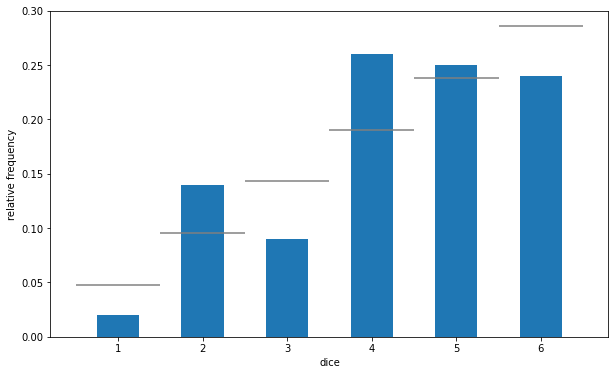

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.5)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

In [ ]:
ax.hist?

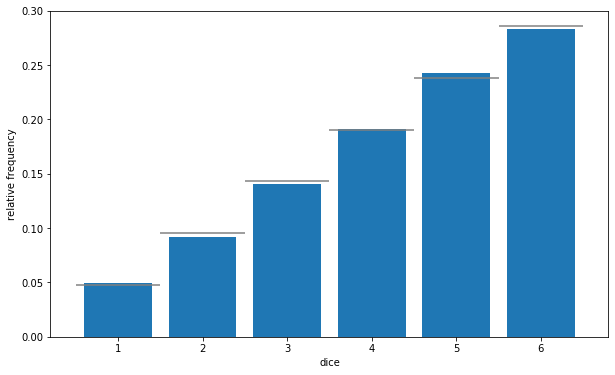

In [ ]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계에서의 확률

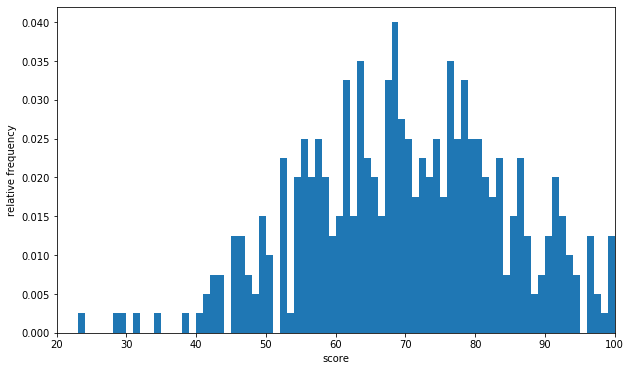

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [ ]:
np.random.choice(scores)

69

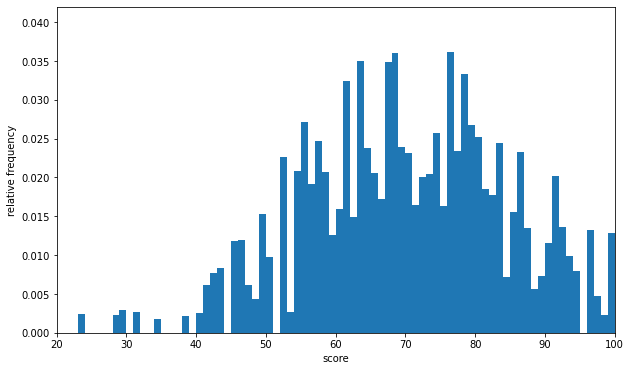

In [ ]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

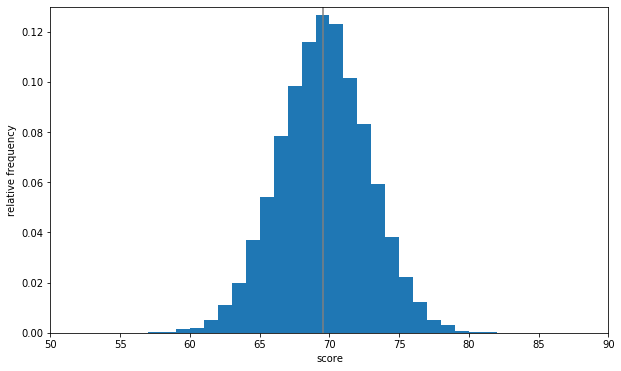

In [ ]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

## 이제부터 배우는 것